In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

# Data Understanding

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
data = {
    'Nominal' : df.isnull().sum(),
    'Persen'  : round(100*(df.isnull().sum())/len(df),2)
}
df_null = pd.DataFrame(data = data, index = df.columns)
df_null

,Nominal,Persen
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


Pada pernyataan diatas didapatkan bahwasanya :
1. Data terdiri 541909 baris dan 8 kolom
2. Kolom tediri 3 tipe integer dan 5 tipe object
3. CustomerID memiliki missing-value bertotal 135 ribu lebih dan Description memiliki missing value 1454. CustomerID memiliki hampir 25% total missing value dari total jumlah data.
4. Dilihat pada statistik diatas, kolom quantity dan UnitPrice memiliki value yang beragam yang dimana nilai STD-nya jauh dari nilai meannya.

# Data Preparation

Pembersihan data dilakukan dengan dilakukan drop missing value.

In [8]:
#Permbersihan data missing
df = df.dropna()
df.shape

(406829, 8)

CustomerID berisi tentang ID dari Customer dan ID merupakan sebuah identitas dan tidak bisa dilakukan aritmatika pada nilainya. Sehingga lebih cocok dirubah kedalam bentuk string. Namun diperlukan pengubahan terlebih dahulu ke integer untuk menghilangkan satuan desimalnya.

In [9]:
#Perubahan tipe data CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


Perubahan tipe yang dilakukan di atas menyebabkan hanya 2 tipe data saja yang bersifat integer. Selanjutnya perubahan tipe data menjadi **date** pada kolom InvoiceDate

In [10]:
#Perubahan tipe data InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


Tahapan selanjutnya dilakukan tahapan Customer Lifetime Value (CLV). CLV adalah cara untuk mengatur hubungan perusahaan dengan konsumennya melalui siklus kehidupan konsumen dan salah satu teknik yang dapat digunakan adalah Receny, Frequency dan Monetary (RFM). RFM merupakan metode analisis yang digunakan membuat segmentasi konsumen menjadi kelas-kelas tertentu dan berikut identitas satu per satu dari RFM.
1. Receny : mengindikasikan pelanggan telah membeli sesuatu baru-baru ini. Pelanggan yang membeli belum lama ini lebih cenderung bereaksi terhadap penawaran baru daripada pelanggan yang transaksi pembeliannya sudah terjadi sejak lama. <br>
2. Frequency : memperlihatkan banyaknya pembelian yang dilakukan konsumen. Jika pelanggan melakukan pembelian lebih sering, hal itu akan menghasilkan respon lebih positif lebih tinggi daripada pelanggan yang jarang membeli sesuatu. <br>
3. Monetary Value : omset pembelian atau nilai moneter mengacu pada semua  pembelian yang dilakukan oleh pelanggan. Pelanggan yang menghabiskan lebih banyak uang  untuk pembelian lebih cenderung menanggapi penawaran daripada pelanggan yang telah menghasilkan jumlah yang lebih kecil.
<br>

Penjelasan di atas dapat disimpulkan bahwasanya untuk mendapat nilai pada RFM ialah
1. Receny : Hasil terkecil hasil tanggal terakhir pada dataset - tanggal terakhir pada tiap konsumen
2. Frequency : Banyaknya teransaksi dari jumlah tanggal pembelian konsumen
3. Monetary : Total dari (Total pemesanan * Harga) dari seluruh pembelian konsumen.

In [13]:
#Pembuatan Receny

#1. Buat Kolom baru untuk mengurangi hasil tanggal terakhir dataset - tiap pembelian tanggal customer
df['last_date'] = max(df['InvoiceDate']) - df['InvoiceDate']
df_Receny = df.groupby('CustomerID')['last_date'].min()
df_Receny = df_Receny.reset_index()
df_Receny.columns = ['CustomerID', 'Receny']

#Ekstrak angkanya saja
df_Receny['Receny'] = df_Receny['Receny'].dt.days
df_Receny

,CustomerID,Receny
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [14]:
#Pembuatan Frequency
df_frequency = df.groupby('CustomerID')['InvoiceDate'].count()
df_frequency = df_frequency.reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [15]:
#Pembuatan Moneraty
df['Mone'] = df['UnitPrice'] * df['Quantity']
df_Moneraty = df.groupby('CustomerID')['Mone'].sum()
df_Moneraty = df_Moneraty.reset_index()
df_Moneraty.columns = ['CustomerID', 'Moneraty']
df_Moneraty.head()

,CustomerID,Moneraty
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [16]:
df[df['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_date,Mone
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom,325 days,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346,United Kingdom,325 days,-77183.6


Hasl di atas menyatakan hasil RFM yang ditunjukkan contoh dari CustomerID 12346. Bisa dilihat jika eksplorasi lebih dalam bahwasanya Receny dari ID 12346 nilai terkecil dari tanggal terakhir nya adalah 325 dan memiliki frekuensi transaksi terakhir berjumlah 2 kali pada tanggal 18 Januari 2011 dan Moneraty nya memiliki + (plus) dan - (minus) pada Mone, sehingga dijumlahkan menghasilkan Moneraty nya adalah 0.

Setelah membuat data-data RFM tersebut, maka akan dilakukan penggabungan.

In [17]:
df_rfm = df_Receny.merge(df_frequency, on = 'CustomerID').merge(df_Moneraty, on = 'CustomerID')
print("Struktur dari Dataset :", df_rfm.shape)
df_rfm.head()

Struktur dari Dataset : (4372, 4)


,CustomerID,Receny,Frequency,Moneraty
0,12346,325,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


            count         mean          std      min       25%      50%  \
Receny     4372.0    91.581199   100.772139     0.00   16.0000   50.000   
Frequency  4372.0    93.053294   232.471608     1.00   17.0000   42.000   
Moneraty   4372.0  1898.459701  8219.345141 -4287.63  293.3625  648.075   

                75%        max  
Receny      143.000     373.00  
Frequency   102.000    7983.00  
Moneraty   1611.725  279489.02  


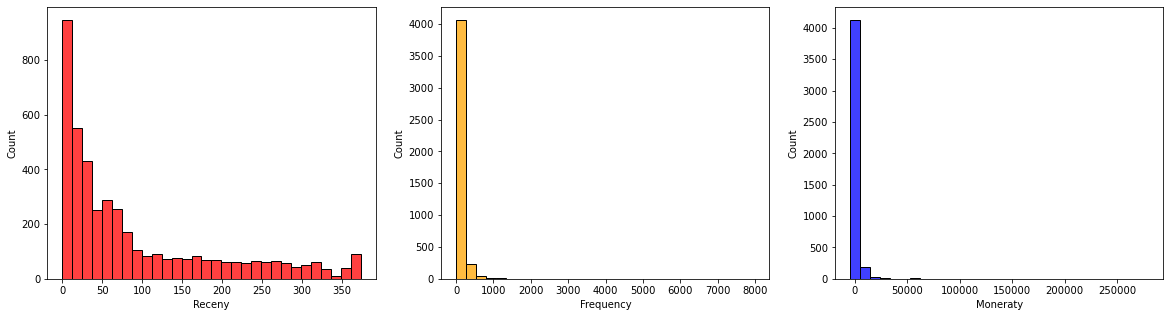

In [18]:
print(df_rfm.describe().T)
fig, ax = plt.subplots(1,3, figsize = (20,5))
color = ['red', 'orange', 'blue']
j = 0
for i, ax, c in zip(df_rfm.select_dtypes(include = 'number'), ax.flatten(), color):
    sns.histplot(df_rfm[i], ax = ax, color = c, bins = 30)

Hasil di atas menunjukkan bahwasanya
1. Nilai Receny, Frequency, dan Moneraty berdistribusi menceng ke kanan (Right Skewed)
    a. Receny: Mean = 91.6, Median = 50, dan std = 100.772
    b. Frequency: Mean = 93.05, Median = 42, dan std = 232.471
    c. Moneraty: Mean = 1898.5, Median = 648.075, dan std = 8219.345
    <br>
2. Dapat dinyatakan bahwa akhir-akhir ini banyak customer yang melakukan transaksi. Pada Receny, banya konsumen yang belum melakukan transaksi terakhirnya. Dimulai dari > 125 hari transaksi terakhirnya <br>
3. Transaksi baru-baru ini kebanyak konsumen melakukan 30 transaksi dengan kurang rata-rata moneraty 1898.5


Segementasi yang dilakukan pada projek ini dilakukan dengan cara melakukan cluster pada ketiga kolom RFM. Untuk itu akan dilakukan terlebih dahulu pencarian nilai k optimal menggunakan elbow dan sillhouette

# Modeling 

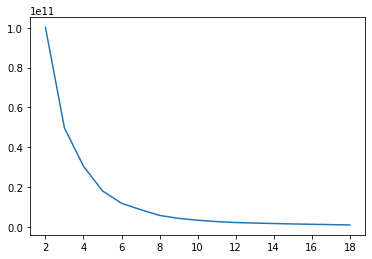

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
optim = []

#Elbow
for k in range(2,19):
    model = KMeans(n_clusters = k)
    model.fit_predict(df_rfm.select_dtypes(include = 'number'))
    
    optim.append(model.inertia_)

plt.plot(range(2,19),optim)

For n_cluster = 2 , silhouette score = 0.9862876300266549
For n_cluster = 3 , silhouette score = 0.9629385686668093
For n_cluster = 4 , silhouette score = 0.8837044774165888
For n_cluster = 5 , silhouette score = 0.8146214243846246
For n_cluster = 6 , silhouette score = 0.7376817744968097
For n_cluster = 7 , silhouette score = 0.771785478321218
For n_cluster = 8 , silhouette score = 0.7190231237005109
For n_cluster = 9 , silhouette score = 0.6716825454098946
For n_cluster = 10 , silhouette score = 0.670839129467762
For n_cluster = 11 , silhouette score = 0.6359926057874045
For n_cluster = 12 , silhouette score = 0.6051176972690082
For n_cluster = 13 , silhouette score = 0.6041714428005418
For n_cluster = 14 , silhouette score = 0.5385918713311372
For n_cluster = 15 , silhouette score = 0.5503328610495452
For n_cluster = 16 , silhouette score = 0.5748400051636132
For n_cluster = 17 , silhouette score = 0.5350409407547643
For n_cluster = 18 , silhouette score = 0.5439125739808786


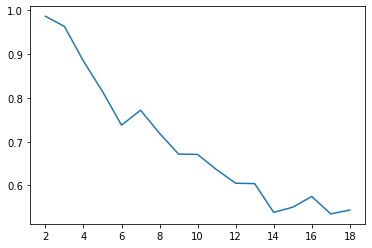

In [20]:
#Sillhouette Score
score = []
for k in range(2,19):
    model = KMeans(n_clusters = k)
    label = model.fit_predict(df_rfm.select_dtypes(include = 'number'))
    silhouette = silhouette_score(df_rfm.select_dtypes(include = 'number'), label, metric = 'euclidean')
    score.append(silhouette)
    print("For n_cluster = {} , silhouette score = {}".format(k, silhouette))

plt.plot(range(2,19),score)

Elbow Method didasari dari sebuah sudut patahan yang paling menonjol. Sedangkan Nilai dari Sillhouette ada diantara -1 sampai dengan 1. Jika nilainya mendekati angka 1, maka titik data akan sangat mirip dengan titik data lainnya di cluster yang sama. Jika mendekati -1 maka titik data tersebut tidak mirip dengan titik data di klusternya.

Hasil Elbow dan Silhouette menyatakan, bahwasanya nilai K terbaik berada pada K = 2. Hal ini dikarenakan sifat antar data yang mirip, namun segmentasi yang dilakukan per tiap variabel R,F,M. Sehingga, projek ini akan menggunakan K = 3 dan nilai silhouette menunjukkan K = 3 masih lebih > 0.95 dan artinya masih mendekati satu.

# Segmentasi

## Level Segmentasi

In [21]:
model = KMeans(n_clusters = 3)

In [22]:
df_Receny_Pred = df_Receny.copy()
df_Receny_Pred['Cluster'] = model.fit_predict(df_Receny_Pred.select_dtypes(include = 'number'))
df_Receny_Pred_Group = df_Receny_Pred.groupby('Cluster')['Receny'].mean()
df_Receny_Pred_Group = df_Receny_Pred_Group.reset_index()
df_Receny_Pred_Group.columns = ['Cluster', 'Means']
df_Receny_Pred_Group

,Cluster,Means
0,0,30.674411
1,1,294.903785
2,2,152.453761


In [23]:
df_Frequency_Pred = df_frequency.copy()
df_Frequency_Pred['Cluster'] = model.fit_predict(df_Frequency_Pred.select_dtypes(include = 'number'))
df_Frequency_Pred_Group = df_Frequency_Pred.groupby('Cluster')['Frequency'].mean()
df_Frequency_Pred_Group = df_Frequency_Pred_Group.reset_index()
df_Frequency_Pred_Group.columns = ['Cluster', 'Means']
df_Frequency_Pred_Group

,Cluster,Means
0,0,60.693525
1,1,5914.000000
2,2,514.784615


In [24]:
df_Moneraty_Pred = df_Moneraty.copy()
df_Moneraty_Pred['Cluster'] = model.fit_predict(df_Moneraty_Pred.select_dtypes(include = 'number'))
df_Moneraty_Pred_Group = df_Moneraty_Pred.groupby('Cluster')['Moneraty'].mean()
df_Moneraty_Pred_Group = df_Moneraty_Pred_Group.reset_index()
df_Moneraty_Pred_Group.columns = ['Cluster', 'Means']
df_Moneraty_Pred_Group

,Cluster,Means
0,0,1434.198064
1,1,241136.560000
2,2,58418.754348


In [25]:
df_RFM_level = df_Receny_Pred_Group.merge(df_Frequency_Pred_Group, on = 'Cluster').merge(df_Moneraty_Pred_Group, on = 'Cluster')
df_RFM_level.columns = ['Cluster','Mean_Receny', 'Mean_Freq', 'Mean_Moneraty']
df_RFM_level

,Cluster,Mean_Receny,Mean_Freq,Mean_Moneraty
0,0,30.674411,60.693525,1434.198064
1,1,294.903785,5914.000000,241136.560000
2,2,152.453761,514.784615,58418.754348


Setelah penentuan cluster dan mendapatkan nilai Mean untuk tiap-tiap Cluster, maka diperlukan pemberian level dengan syarat.
1. Receny: <br>
    a. Receny <= 30.674411 --> Cluster 1 (Level 2) <br>
    b. Receny > 30.674411 AND Receny <= 152.453761 --> Cluster 2 (Level 1) <br>
    c. Receny > 152.453761 --> Cluster 0 (Level 0)<br>
<br>
2. Frequency:<br>
    a. Frequency <= 60.693525 --> Cluster 0 (Level 0)<br>
    b. Frequency > 60.693525 AND Frequency <= 514.784615 --> Cluster 2 (Level 1)<br>
    c. Frequency > 152.453761 --> Cluster 1 (Level 2)<br>
<br>
3. Moneraty:<br>
    a. Frequency <= 1434.198064 --> Cluster 0 (Level 0)<br>
    b. Frequency > 1434.198064 AND Frequency <= 58418.754348 --> Cluster 2 (Level 1)<br>
    c. Frequency > 58418.754348 --> Cluster 1 (Level 2)
    
<br>
Dimana ketentuan level adalah <br>
1. Level 2 -->  High <br>
2. Level 1 --> Medium <br>
3. Level 0 --> Low <br>

Sehingga total dari RFM Segmentasi nya terdiri dari 0 hingga 6 yang didapatkan dari <br>
**RFM Segmentasi = Receny Level + Frequency Level + Moneraty Level**
<br><br>
dimana 0 hingga 6 memiliki arti
1. 0 --> Tidak Loyalti <br>
2. 1 dan 2 --> Loyalti Rendah <br>
3. 3 dan 4 --> Loyalti Sedang <br>
4. 5 dan 6 --> Loyalti Tinggi <br>

# RFM Segmentasi 

In [26]:
#Receny Level
df_receny_level = df_Receny.copy()
condition_Receny = [
    (df_receny_level['Receny'] <= 30.674411),
    (df_receny_level['Receny'] > 30.674411) & (df_receny_level['Receny'] <= 152.453761),
    (df_receny_level['Receny'] > 152.453761)
]

result_conditions = [2, 1, 0]

df_receny_level['Receny_Level'] = np.select(condition_Receny, result_conditions, default = 2)


#Frequency Level
df_Frequency_level = df_frequency.copy()
condition_Frequency = [
    (df_Frequency_level['Frequency'] <= 60.693525),
    (df_Frequency_level['Frequency'] > 60.693525) & (df_Frequency_level['Frequency'] <= 514.784615),
    (df_Frequency_level['Frequency'] > 514.784615)
]

result_conditions = [0, 1, 2]

df_Frequency_level['Frequency_Level'] = np.select(condition_Frequency, result_conditions, default = 0)


#Moneraty Level
df_Moneraty_level = df_Moneraty.copy()
condition_Moneraty = [
    (df_Moneraty_level['Moneraty'] <= 1434.198064),
    (df_Moneraty_level['Moneraty'] > 1434.198064) & (df_Moneraty_level['Moneraty'] <= 58418.754348),
    (df_Moneraty_level['Moneraty'] > 514.784615)
]

result_conditions = [0, 1, 2]

df_Moneraty_level['Moneraty_Level'] = np.select(condition_Moneraty, result_conditions, default = 0)

In [27]:
df_RFM_Segmen = df_receny_level.merge(df_Frequency_level, on = 'CustomerID').merge(df_Moneraty_level, on = 'CustomerID')
df_RFM_Segmen = df_RFM_Segmen[['CustomerID','Receny_Level', 'Frequency_Level', 'Moneraty_Level']]
df_RFM_Segmen['RFM_Level'] = df_RFM_Segmen['Receny_Level'] + df_RFM_Segmen['Frequency_Level'] + df_RFM_Segmen['Moneraty_Level']
df_RFM_Segmen

,CustomerID,Receny_Level,Frequency_Level,Moneraty_Level,RFM_Level
0,12346,0,0,0,0
1,12347,2,1,1,4
2,12348,1,0,1,2
3,12349,2,1,1,4
4,12350,0,0,0,0
...,...,...,...,...,...
4367,18280,0,0,0,0
4368,18281,0,0,0,0
4369,18282,2,0,0,2
4370,18283,2,2,1,5


C:\Users\adiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


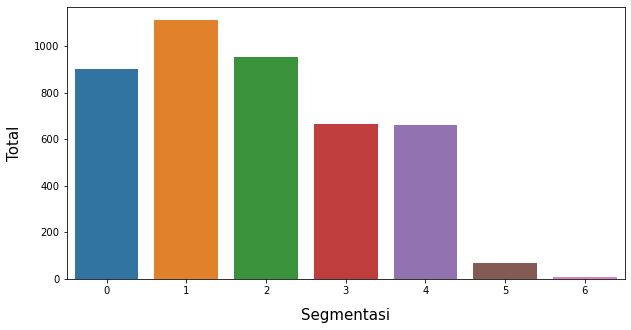

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(df_RFM_Segmen['RFM_Level'])
plt.xlabel('Segmentasi', fontsize = 15, labelpad = 12)
plt.ylabel('Total', fontsize = 15, labelpad = 12)
plt.show();

Pada plot di atas dapat disimpulkan bahwasanya <br>
1. Jumlah konsumen tersebar pada golongan Tidak Loyalti dan Loyalti Rendah <br>
2. Kategori Layolti Sedang memiliki proporsi yang hampir sama <br>
3. Pada kategori Loyalti Tinggi memiliki proporsi kurang dari 100. Dimana total kategori 6 hanya berjumlah 7 konsumen <br>
4. Sehingga konsumen yang dimiliki perusahaan saat ini kebanyakan tidak terlalu royal pada produk yang dihasilkan perusahaan

## Analisis Berdasarkan Negara Berdasarkan Hasil Segmentasi 

In [29]:
df_RFM_country = df_RFM_Segmen[['CustomerID', 'RFM_Level']]
df_RFM_country = df_RFM_country.merge(df, on = 'CustomerID', how = 'inner')
df_RFM_country = df_RFM_country[['CustomerID', 'RFM_Level', 'Country']]
df_RFM_country.drop_duplicates(subset = ['CustomerID'], inplace = True)
df_RFM_country = df_RFM_country.reset_index(drop = True)
df_RFM_country.shape

(4372, 3)

In [30]:
df_RFM_country

,CustomerID,RFM_Level,Country
0,12346,0,United Kingdom
1,12347,4,Iceland
2,12348,2,Finland
3,12349,4,Italy
4,12350,0,Norway
...,...,...,...
4367,18280,0,United Kingdom
4368,18281,0,United Kingdom
4369,18282,2,United Kingdom
4370,18283,5,United Kingdom


In [31]:
df_RFM_country[df_RFM_country['Country'] == 'United Arab Emirates']

,CustomerID,RFM_Level,Country
325,12739,1,United Arab Emirates
4033,17829,0,United Arab Emirates


C:\Users\adiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


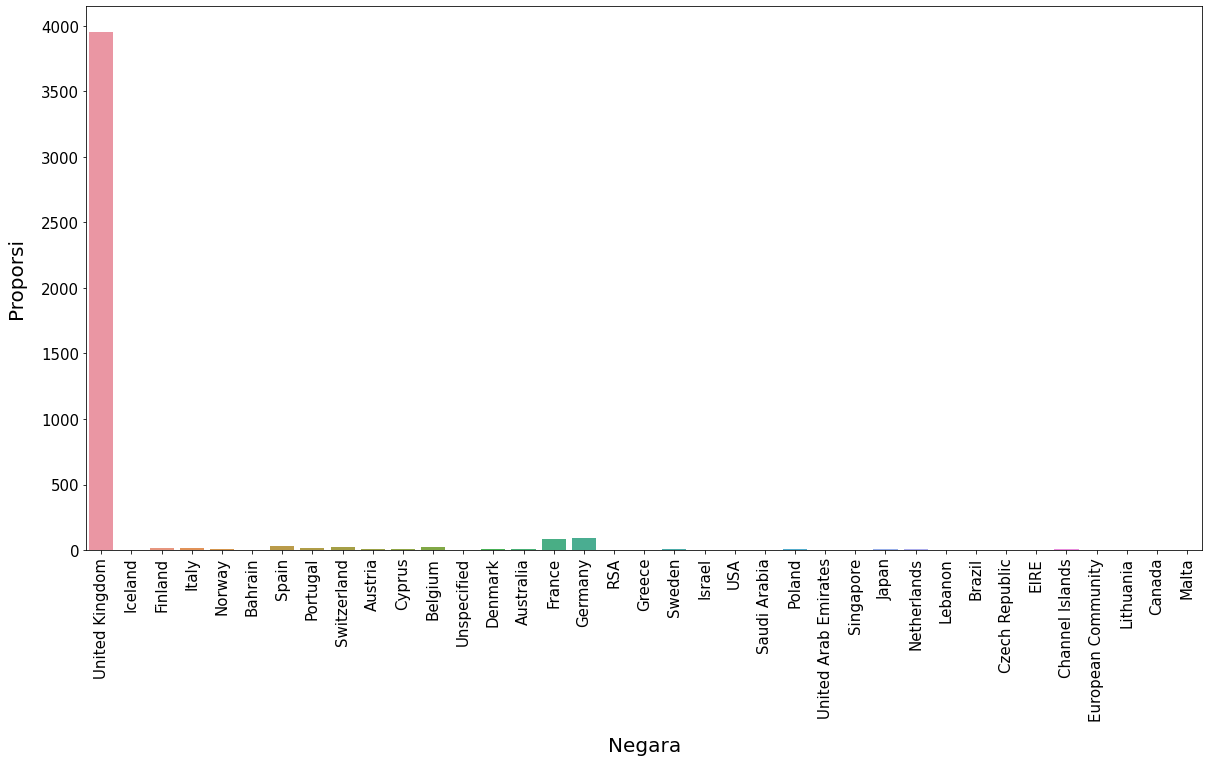

In [32]:
plt.figure(figsize = (20, 10))
sns.countplot(df_RFM_country['Country'])
plt.xlabel('Negara', fontsize = 20, labelpad = 15)
plt.ylabel('Proporsi', fontsize = 20, labelpad = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

C:\Users\adiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


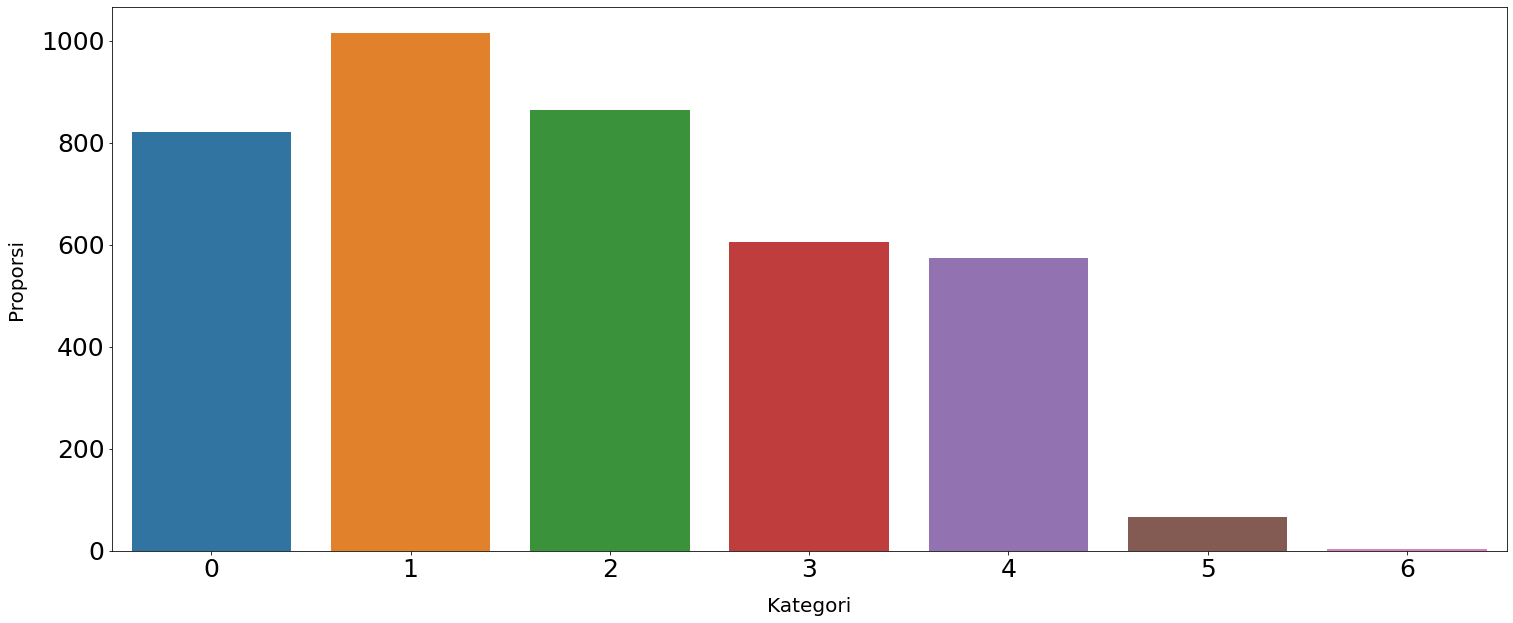

In [33]:
plt.figure(figsize = (25, 10))
df_RFM_uk = df_RFM_country[df_RFM_country['Country'] == 'United Kingdom']
sns.countplot(df_RFM_uk['RFM_Level'])
plt.xlabel('Kategori', fontsize = 20, labelpad = 15)
plt.ylabel('Proporsi', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

Hasil visualisasi dapat disimpulkan bahwasanya 
1. United Kingdom lebih banyak menyumbang konsumen yang hampir menyentuh 90% dari total konsumen yang dimiliki perusahaan <br>.
2. Dimana dari jumlah 7 konsumen pada kategori 6, UK menyumbang 3 konsumen pada kategori tersebut. Sisanya berada pada negara Australia, Belanda, dan EIRE <br>.
3. Sehingga dapat disimpulkan, bahwasanya peluang tertinggi untuk meningkatkan transaksi konsumen terhadap perusahaan berada pada negara UK. Namun untuk negara lain dapat dilakukan analisis marketing yang lebih dalam yang dapat dilihat salah satunya dari karakteristik tiap negara